<a href="https://colab.research.google.com/github/Mehervamsi1/Text-to-Sign-Conversion-using-Deep-Learning/blob/dev/Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt




In [ ]:
import numpy as np

In [ ]:
# Define the path to the directory containing the uploaded FLAC files

sample_data_folder = "/content/sample_data"  # Update with the path to your sample data folder



In [ ]:
# List to store audio data and metadata
audio_data = []

In [ ]:
# Function to process FLAC files
def process_flac_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".flac"):
                flac_file_path = os.path.join(root, file)
                # Load FLAC file
                y, sr = librosa.load(flac_file_path, sr=None)
                # Extract features (e.g., Mel spectrogram)
                mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
                # Store audio data and metadata
                audio_data.append({"file_path": flac_file_path, "audio_data": y, "sampling_rate": sr, "mel_spectrogram": mel_spec})


In [ ]:
# Traverse through subfolders in the sample data folder and process FLAC files
process_flac_files(sample_data_folder)


In [ ]:
# Print the number of FLAC files found
print("Number of FLAC files found:", len(audio_data))


Number of FLAC files found: 19


In [ ]:
# Print the first few audio files' metadata
for i, entry in enumerate(audio_data[:5]):
    print(f"File {i + 1}: {entry['file_path']}, Sampling Rate: {entry['sampling_rate']}, Shape of Mel Spectrogram: {entry['mel_spectrogram'].shape}")


File 1: /content/sample_data/84-121123-0002.flac, Sampling Rate: 16000, Shape of Mel Spectrogram: (128, 428)
File 2: /content/sample_data/84-121123-0007.flac, Sampling Rate: 16000, Shape of Mel Spectrogram: (128, 63)
File 3: /content/sample_data/84-121123-0018.flac, Sampling Rate: 16000, Shape of Mel Spectrogram: (128, 111)
File 4: /content/sample_data/84-121123-0003.flac, Sampling Rate: 16000, Shape of Mel Spectrogram: (128, 213)
File 5: /content/sample_data/84-121123-0016.flac, Sampling Rate: 16000, Shape of Mel Spectrogram: (128, 263)


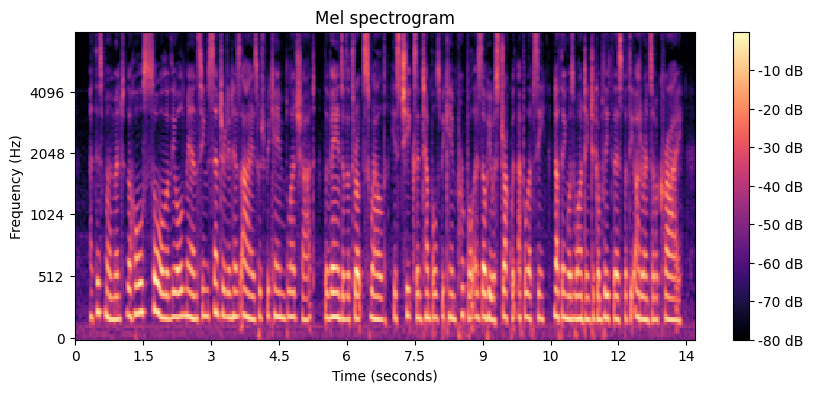

In [ ]:
# Visualize the Mel spectrogram of the first audio file
if audio_data:
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(audio_data[0]["mel_spectrogram"], ref=np.max), sr=audio_data[0]["sampling_rate"], x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
else:
    print("No FLAC files found in the sample data folder.")

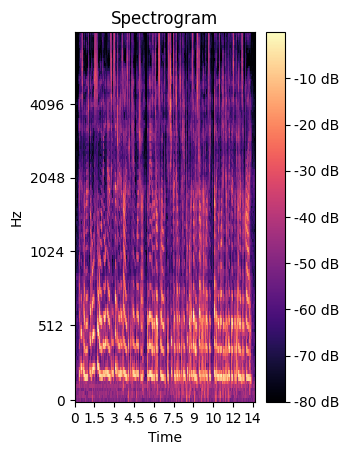

In [ ]:
# Plot spectrogram of the first audio file
plt.subplot(1, 2, 2)
spec = librosa.feature.melspectrogram(y=audio_data[0]["audio_data"], sr=audio_data[0]["sampling_rate"])
librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), sr=audio_data[0]["sampling_rate"], x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

Text(0.5, 1.0, 'Waveform')

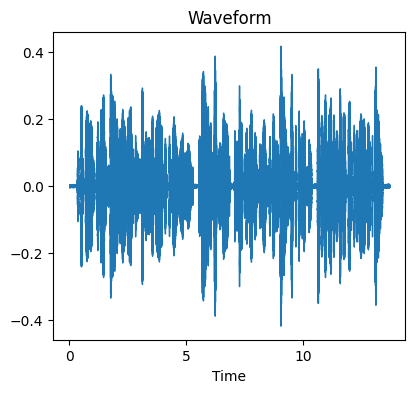

In [ ]:
# Visualization
plt.figure(figsize=(10, 4))
# Plot waveform of the first audio file
plt.subplot(1, 2, 1)
librosa.display.waveshow(audio_data[0]["audio_data"], sr=audio_data[0]["sampling_rate"])
plt.title('Waveform')

In [ ]:
# Duration Analysis
audio_durations = [librosa.get_duration(y=audio["audio_data"], sr=audio["sampling_rate"]) for audio in audio_data]
print("Mean duration:", np.mean(audio_durations))
print("Minimum duration:", np.min(audio_durations))
print("Maximum duration:", np.max(audio_durations))


Mean duration: 5.627108552631579
Minimum duration: 2.0
Maximum duration: 15.96


In [ ]:
# Sampling Rate Analysis
sampling_rates = [audio["sampling_rate"] for audio in audio_data]
print("Sampling rates:", sampling_rates)

Sampling rates: [16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000, 16000]
